## 3. Popularity-based Model

This is the baseline approach to compare other models. We will assign the most N popular games to each gamer and compute the Hit Gain Ratio

In [2]:
import pandas as pd
import numpy as np


In [3]:
### All random states are assigned to 42 for reproducible results
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)


### Sorting top-N Popularity

Exploring columns to represent popularity of games

In [4]:
%run "01.Recommendation_Loading.ipynb"

################  Recommendations (all data, positive recommendations only) ################
Users: 12,663,134
Games: 37,419
Number of reviews: 35,304,398
Number of users 2
First five users id [8305133   48950]
################  Recommendations (Sample) ################
Minimum number of recommendations to be included in the sample: 20
Number of randomly selected users: 2
Users: 2
Games: 49
Number of reviews: 49
################ User-Game Matrix ################
Number of Rows: 2
Numbeer of Columns: 49
Number of stored values: 49


In [5]:
def get_popular_games(df, K_pop):
    rec_pop = df.groupby("app_id_categorical")\
                        .is_recommended.agg(["sum"])\
                        .sort_values("sum", ascending=False)\
                        .reset_index()\
                        .head(K_pop)\
                        .loc[:,["app_id_categorical", "sum"]]
                        #.values
    return rec_pop

recommendations_pop = get_popular_games(recommendations, 10)
recommendations_pop

,app_id_categorical,sum
0,0,1
1,25,1
2,27,1
3,28,1
4,29,1
5,30,1
6,31,1
7,32,1
8,33,1
9,34,1


In [6]:
games_top_pop = recommendations_pop.loc[:,"app_id_categorical"]
games_top_pop.head()

0     0
1    25
2    27
3    28
4    29
Name: app_id_categorical, dtype: int64

In [7]:
games_idx = pd.read_csv('matrix/games_idx.csv')
games_idx.head()


,app_id,app_id_categorical
0,431960,16
1,1805930,48
2,637850,25
3,1279700,39
4,1120360,35


In [8]:
games_idx_pop = games_idx[games_idx["app_id_categorical"].isin(games_top_pop)]
games_idx_pop

,app_id,app_id_categorical
2,637850,25
5,964350,31
9,939400,30
11,795420,28
13,978460,32
17,919330,29
24,777650,27
26,1045720,34
29,994280,33
30,3920,0


In [9]:
games_idx_pop = pd.merge(games_idx_pop, recommendations_pop,
                         left_on="app_id_categorical",
                         right_on="app_id_categorical")
games_idx_pop

,app_id,app_id_categorical,sum
0,637850,25,1
1,964350,31,1
2,939400,30,1
3,795420,28,1
4,978460,32,1
5,919330,29,1
6,777650,27,1
7,1045720,34,1
8,994280,33,1
9,3920,0,1


In [10]:
games = pd.read_csv("resources/games.csv")
games.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,10.0,10.0,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,3.0,3.0,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,15.0,15.0,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,15.0,15.0,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,12.0,12.0,0.0,True


Let's see the top K games by popularity

In [11]:
pop_games_df = pd.merge(games_idx_pop,games, left_on="app_id", right_on="app_id")
pop_games_df

,app_id,app_id_categorical,sum,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,637850,25,1,Confess My Love,2017-05-27,True,False,False,Very Positive,93,4393,0.0,0.0,0.0,True
1,964350,31,1,At Home Alone,2018-11-01,True,False,False,Very Positive,84,1801,0.0,0.0,0.0,True
2,939400,30,1,LoveChoice,2021-11-15,True,True,False,Overwhelmingly Positive,95,15573,2.0,2.0,0.0,True
3,795420,28,1,The Darkside Detective: A Fumble in the Dark,2021-04-15,True,True,True,Overwhelmingly Positive,96,954,15.0,15.0,0.0,True
4,978460,32,1,Emily is Away <3,2021-04-16,True,True,False,Very Positive,93,4077,10.0,10.0,0.0,True
5,919330,29,1,Ghost in the pool,2021-01-27,True,False,False,Mostly Positive,75,202,5.0,5.0,0.0,True
6,777650,27,1,Yet Another Research Dog,2018-02-02,True,True,False,Very Positive,84,322,1.0,1.0,0.0,True
7,1045720,34,1,The Coma 2: Vicious Sisters,2020-01-28,True,True,True,Overwhelmingly Positive,96,1697,15.0,15.0,0.0,True
8,994280,33,1,古剑奇谭三(Gujian3),2018-12-14,True,False,False,Very Positive,86,36971,30.0,30.0,0.0,True
9,3920,0,1,Sid Meier's Pirates!,2005-07-11,True,False,False,Very Positive,94,4607,2.5,10.0,75.0,True


In [12]:
!pip install tabulate

In [13]:
print(pop_games_df[["title","sum"]].sort_values("sum", ascending=False).rename({"title":"Game", "sum":"# reviews"}, axis=1).reset_index(drop=True).to_markdown())

|    | Game                                         |   # reviews |
|---:|:---------------------------------------------|------------:|
|  0 | Confess My Love                              |           1 |
|  1 | At Home Alone                                |           1 |
|  2 | LoveChoice                                   |           1 |
|  3 | The Darkside Detective: A Fumble in the Dark |           1 |
|  4 | Emily is Away <3                             |           1 |
|  5 | Ghost in the pool                            |           1 |
|  6 | Yet Another Research Dog                     |           1 |
|  7 | The Coma 2: Vicious Sisters                  |           1 |
|  8 | 古剑奇谭三(Gujian3)                          |           1 |
|  9 | Sid Meier's Pirates!                         |           1 |


|    | Game                      |   # reviews |
|---:|:--------------------------|------------:|
|  0 | The Witcher® 3: Wild Hunt |        1221 |
|  1 | Portal 2                  |        1187 |
|  2 | Cyberpunk 2077            |        1170 |
|  3 | DARK SOULS™ III           |        1161 |
|  4 | Team Fortress 2           |        1161 |
|  5 | Left 4 Dead 2             |        1139 |
|  6 | DOOM                      |        1116 |
|  7 | Tomb Raider               |        1097 |
|  8 | Fallout 4                 |        1045 |
|  9 | Half-Life 2               |        1037 |

Define game popularity as the highest number of recommended reviews:

In [14]:
%run "Get_Training_and_Test_Instances.ipynb"

################  Get Test Data ################
x_test.shape: (2, 2)
y_test.shape: (2, 1)
Number of Users: 2
Number of Games: 49
Number of Negatives Sample per User-Game: 2
################  Get Training Data ################
x_train.shape: (94, 2)
y_train.shape: (94, 2)


In [15]:
games_top_pop_values = games_top_pop.values
games_top_pop_values

array([ 0, 25, 27, 28, 29, 30, 31, 32, 33, 34], dtype=int64)

In [16]:
eval_hit_ratio_pop(games_top_pop_values, x_test)

0.0

In [17]:
hgr_pop_list = []
for k in range(50):
    recommendations_pop = get_popular_games(recommendations, k)
    games_top_pop_values = recommendations_pop.loc[:,"app_id_categorical"].values
    hgr_pop = eval_hit_ratio_pop(games_top_pop_values, x_test)
    hgr_pop_list.append(hgr_pop)
    print("Top @", k, "popular games,", "Hit Gain Ratio", '{0:.4%}'.format(hgr_pop))
    

Top @ 0 popular games, Hit Gain Ratio 0.0000%
Top @ 1 popular games, Hit Gain Ratio 0.0000%
Top @ 2 popular games, Hit Gain Ratio 0.0000%
Top @ 3 popular games, Hit Gain Ratio 0.0000%
Top @ 4 popular games, Hit Gain Ratio 0.0000%
Top @ 5 popular games, Hit Gain Ratio 0.0000%
Top @ 6 popular games, Hit Gain Ratio 0.0000%
Top @ 7 popular games, Hit Gain Ratio 0.0000%
Top @ 8 popular games, Hit Gain Ratio 0.0000%
Top @ 9 popular games, Hit Gain Ratio 0.0000%
Top @ 10 popular games, Hit Gain Ratio 0.0000%
Top @ 11 popular games, Hit Gain Ratio 0.0000%
Top @ 12 popular games, Hit Gain Ratio 0.0000%
Top @ 13 popular games, Hit Gain Ratio 0.0000%
Top @ 14 popular games, Hit Gain Ratio 0.0000%
Top @ 15 popular games, Hit Gain Ratio 0.0000%
Top @ 16 popular games, Hit Gain Ratio 0.0000%
Top @ 17 popular games, Hit Gain Ratio 0.0000%
Top @ 18 popular games, Hit Gain Ratio 0.0000%
Top @ 19 popular games, Hit Gain Ratio 0.0000%
Top @ 20 popular games, Hit Gain Ratio 0.0000%
Top @ 21 popular games,

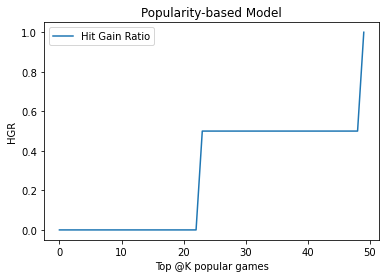

In [18]:
plt.plot(hgr_pop_list, label="Hit Gain Ratio")
plt.title("Popularity-based Model")
plt.xlabel("Top @K popular games")
plt.ylabel("HGR")
plt.legend()
plt.show()

# 